In [1]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,accuracy_score,RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
na_values = ['unknown']
df = pd.read_csv('bank-full.csv',na_values=na_values,keep_default_na=False)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
subscribed = df['y'] == 'yes'
not_subscribed = df['y'] == 'no'
subscription_percentage = (len(df.loc[subscribed])/len(df['y']))*100
subscription_percentage

11.698480458295547

In [6]:
df_subscribed = df[subscribed]
df_not_subscribed = df[not_subscribed]
df_not_subscribed = df_not_subscribed.sample(frac=0.132,random_state=42)

In [7]:
frames = [df_subscribed,df_not_subscribed]
df = pd.concat(frames)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
86,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
87,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
129,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
168,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,48,entrepreneur,single,tertiary,no,2313,no,no,NaN,6,jun,130,1,-1,0,NaN,no
5330,36,admin.,married,secondary,no,-118,yes,yes,NaN,23,may,263,2,-1,0,NaN,no
20234,60,management,single,tertiary,no,2190,no,no,cellular,11,aug,601,2,-1,0,NaN,no
7640,34,services,married,secondary,no,457,yes,no,NaN,30,may,67,2,-1,0,NaN,no


In [8]:
subscribed = df['y'] == 'yes'
not_subscribed = df['y'] == 'no'
subscription_percentage = (len(df.loc[subscribed])/len(df['y']))*100
subscription_percentage

50.0899706411592

In [9]:
df = df.sample(frac=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
23358,58,services,married,secondary,no,1905,no,no,cellular,27,aug,202,5,-1,0,NaN,no
14911,26,admin.,single,secondary,yes,0,yes,no,cellular,16,jul,157,2,-1,0,NaN,no
43533,41,management,divorced,tertiary,no,5037,no,no,cellular,23,apr,252,9,185,5,other,yes
32424,54,technician,married,secondary,no,3994,no,yes,cellular,16,apr,299,2,-1,0,NaN,yes
4866,36,management,married,tertiary,no,849,yes,yes,NaN,21,may,958,2,-1,0,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24716,42,technician,married,secondary,no,525,no,no,cellular,17,nov,172,3,-1,0,NaN,no
37250,32,blue-collar,single,primary,no,398,yes,no,cellular,13,may,716,1,-1,0,NaN,yes
36889,45,self-employed,divorced,tertiary,no,963,yes,no,cellular,12,may,528,5,-1,0,NaN,yes
31047,22,student,single,secondary,no,381,no,no,cellular,12,feb,227,1,-1,0,NaN,yes


<AxesSubplot:>

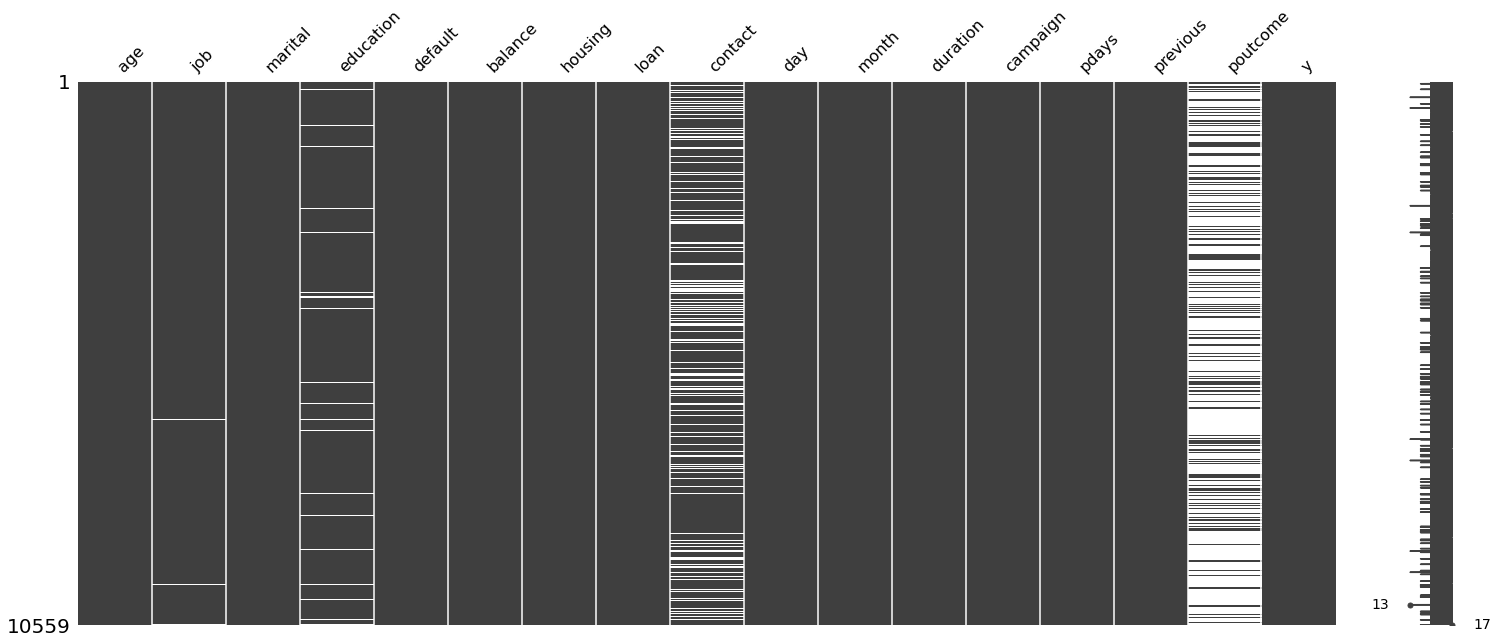

In [10]:
missingno.matrix(df,figsize=(25,10))

In [11]:
df.isnull().sum()

age             0
job            67
marital         0
education     459
default         0
balance         0
housing         0
loan            0
contact      2193
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     7849
y               0
dtype: int64

In [12]:
new_df = df
new_df = new_df.drop(['poutcome','contact'],axis=1)
new_df = new_df.dropna()
new_df = new_df.reset_index(drop=True)

In [13]:
df_bin = pd.DataFrame()
df_bin['job'] = new_df['job']
df_bin['marital'] = new_df['marital']
df_bin['education'] = new_df['education']
df_bin['default'] = new_df['default']
df_bin['housing'] = new_df['housing']
df_bin['loan'] = new_df['loan']
df_bin['y'] = new_df['y']
df_bin

,job,marital,education,default,housing,loan,y
0,services,married,secondary,no,no,no,no
1,admin.,single,secondary,yes,yes,no,no
2,management,divorced,tertiary,no,no,no,yes
3,technician,married,secondary,no,no,yes,yes
4,management,married,tertiary,no,yes,yes,yes
...,...,...,...,...,...,...,...
10058,technician,married,secondary,no,no,no,no
10059,blue-collar,single,primary,no,yes,no,yes
10060,self-employed,divorced,tertiary,no,yes,no,yes
10061,student,single,secondary,no,no,no,yes


In [14]:
ordinal_encoder = OrdinalEncoder()
df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_bin),columns=list(df_bin.columns))
df_encoded

,job,marital,education,default,housing,loan,y
0,7.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,1.0,1.0,0.0,0.0
2,4.0,0.0,2.0,0.0,0.0,0.0,1.0
3,9.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4.0,1.0,2.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
10058,9.0,1.0,1.0,0.0,0.0,0.0,0.0
10059,1.0,2.0,0.0,0.0,1.0,0.0,1.0
10060,6.0,0.0,2.0,0.0,1.0,0.0,1.0
10061,8.0,2.0,1.0,0.0,0.0,0.0,1.0


In [15]:
ordinal_encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [16]:
df_con = new_df
df_con = df_con.drop(['job','marital','education','default','housing','loan','month','y'],axis=1)

In [17]:
df_con

,age,balance,day,duration,campaign,pdays,previous
0,58,1905,27,202,5,-1,0
1,26,0,16,157,2,-1,0
2,41,5037,23,252,9,185,5
3,54,3994,16,299,2,-1,0
4,36,849,21,958,2,-1,0
...,...,...,...,...,...,...,...
10058,42,525,17,172,3,-1,0
10059,32,398,13,716,1,-1,0
10060,45,963,12,528,5,-1,0
10061,22,381,12,227,1,-1,0


In [18]:
whole_df = df_con
whole_df['job'] = df_encoded['job']
whole_df['marital'] = df_encoded['marital']
whole_df['education'] = df_encoded['education']
whole_df['default'] = df_encoded['default']
whole_df['housing'] = df_encoded['housing']
whole_df['loan'] = df_encoded['loan']
whole_df['y'] = df_encoded['y']
whole_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,y
0,58,1905,27,202,5,-1,0,7.0,1.0,1.0,0.0,0.0,0.0,0.0
1,26,0,16,157,2,-1,0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
2,41,5037,23,252,9,185,5,4.0,0.0,2.0,0.0,0.0,0.0,1.0
3,54,3994,16,299,2,-1,0,9.0,1.0,1.0,0.0,0.0,1.0,1.0
4,36,849,21,958,2,-1,0,4.0,1.0,2.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10058,42,525,17,172,3,-1,0,9.0,1.0,1.0,0.0,0.0,0.0,0.0
10059,32,398,13,716,1,-1,0,1.0,2.0,0.0,0.0,1.0,0.0,1.0
10060,45,963,12,528,5,-1,0,6.0,0.0,2.0,0.0,1.0,0.0,1.0
10061,22,381,12,227,1,-1,0,8.0,2.0,1.0,0.0,0.0,0.0,1.0


In [19]:
corr_matrix = whole_df.corr()
corr_matrix['y'].sort_values(ascending=True)

housing     -0.209475
campaign    -0.133751
loan        -0.118245
day         -0.046764
default     -0.037797
age          0.038973
marital      0.063857
job          0.066137
previous     0.085486
balance      0.087287
education    0.116835
pdays        0.151080
duration     0.444438
y            1.000000
Name: y, dtype: float64

In [20]:
train_set,test_set = train_test_split(whole_df,test_size=0.2,random_state=42)

In [21]:
y_train = train_set['y']
x_train = train_set.drop(['y'],axis=1)
y_train_one = (y_train == 1.0)
y_test = test_set['y']
x_test = test_set.drop(['y'],axis=1)
y_test_one = (y_test == 1.0)

In [22]:
prediction = {'Model':[],'Accuracy Score':[],'F1 Score':[]}
prediction_df = pd.DataFrame(prediction)

## Logistic Regression

In [23]:
lr_clf = LogisticRegression(solver='lbfgs',max_iter=3500,random_state=42)
lr_clf.fit(x_train,y_train)

LogisticRegression(max_iter=3500, random_state=42)

In [24]:
y_pred = lr_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.7699950322901142


In [25]:
confusion_matrix(y_test,y_pred)

array([[771, 208],
       [255, 779]], dtype=int64)

<AxesSubplot:>

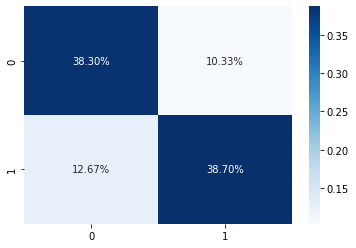

In [26]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [27]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'F1 Score:{f1_score(y_test,y_pred)}')
f = f1_score(y_test,y_pred)
log_reg_score = {'Model':lr_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(log_reg_score,ignore_index=True,)

Precision Score:0.7892603850050659
Recall Score:0.753384912959381
F1 Score:0.7709054923305294


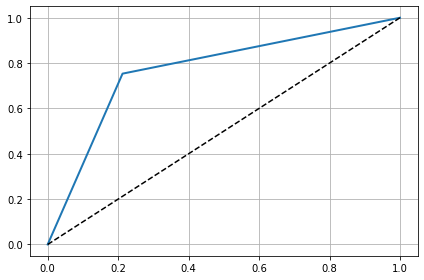

In [28]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr,tpr)
plt.tight_layout()
plt.grid()
plt.show()

In [29]:
roc_auc_score(y_test,y_pred)

0.770461608675809

## Decision Trees

In [30]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = tree_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7247888723298559

In [32]:
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4,9],'min_samples_leaf':[2],'max_features':[9]}
tree_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42,splitter='random'),params,verbose=1,cv=3)
tree_grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(random_state=42,
                                              splitter='random'),
             param_grid={'max_features': [9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [2],
                         'min_samples_split': [2, 3, 4, 9]},
             verbose=1)

In [33]:
tree_grid_search_cv.best_estimator_

DecisionTreeClassifier(max_features=9, max_leaf_nodes=63, min_samples_leaf=2,
                       min_samples_split=9, random_state=42, splitter='random')

In [34]:
y_pred = tree_grid_search_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.7868852459016393


In [35]:
confusion_matrix(y_test,y_pred)

array([[747, 232],
       [197, 837]], dtype=int64)

<AxesSubplot:>

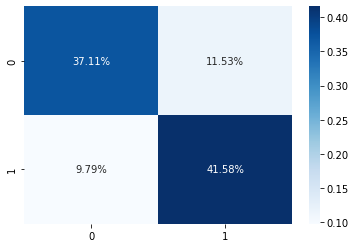

In [36]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [37]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'F1 Score:{f1_score(y_test,y_pred)}')
f = f1_score(y_test,y_pred)
tree_score = {'Model':'Decision Tree','Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(tree_score,ignore_index=True)

Precision Score:0.7829747427502338
Recall Score:0.809477756286267
F1 Score:0.7960057061340942


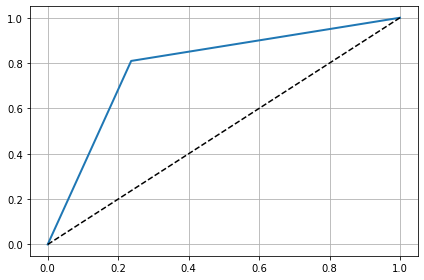

In [38]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr,tpr)
plt.tight_layout()
plt.grid()
plt.show()

In [39]:
roc_auc_score(y_test,y_pred)

0.7862506248234195

## Bagging Classifier

In [40]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [41]:
y_pred = bag_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.7908594138102335


In [42]:
confusion_matrix(y_test,y_pred)

array([[754, 225],
       [196, 838]], dtype=int64)

<AxesSubplot:>

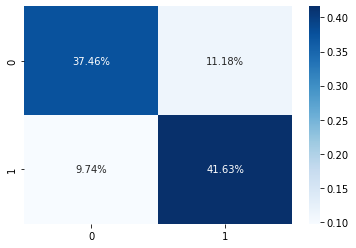

In [43]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [44]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'F1 Score:{f1_score(y_test,y_pred)}')
f = f1_score(y_test,y_pred)
bag_score = {'Model':bag_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(bag_score,ignore_index=True)

Precision Score:0.7883349012229539
Recall Score:0.8104448742746615
F1 Score:0.7992370052455889


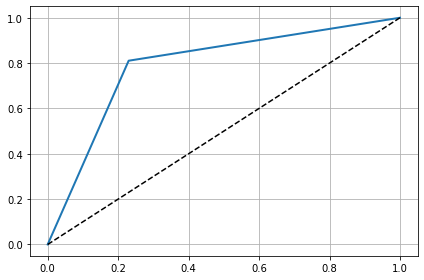

In [45]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr,tpr)
plt.tight_layout()
plt.grid()
plt.show()

In [46]:
roc_auc_score(y_test,y_pred)

0.7903092604264013

## Random Forest

In [47]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(x_train,y_train)
y_pred = rnd_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8112270243417784

In [48]:
params={'n_estimators':[500],'min_samples_split':list(range(2,10)),'min_samples_leaf':list(range(1,10))}
rnd_grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42,n_jobs=-1,bootstrap=True),params,verbose=1,cv=3)
rnd_grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [500]},
             verbose=1)

In [49]:
rnd_grid_search_cv.best_estimator_

RandomForestClassifier(min_samples_leaf=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [50]:
y_pred = rnd_grid_search_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.8072528564331843


In [51]:
confusion_matrix(y_test,y_pred)

array([[754, 225],
       [163, 871]], dtype=int64)

<AxesSubplot:>

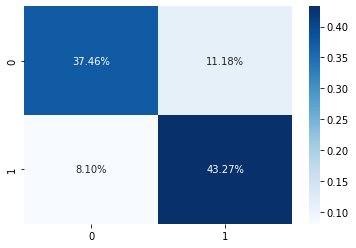

In [52]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [53]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'F1 Score:{f1_score(y_test,y_pred)}')
f = f1_score(y_test,y_pred)
random_score = {'Model':'Random Forest','Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(random_score,ignore_index=True)

Precision Score:0.7947080291970803
Recall Score:0.8423597678916828
F1 Score:0.8178403755868544


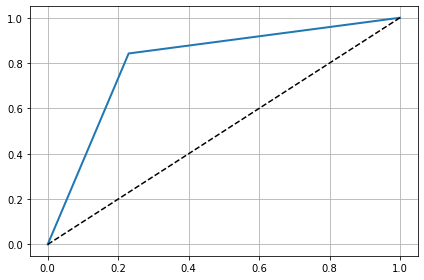

In [54]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr,tpr)
plt.tight_layout()
plt.grid()
plt.show()

In [55]:
roc_auc_score(y_test,y_pred)

0.8062667072349119

## Voting Classifier

In [56]:
voting_clf = VotingClassifier(
    estimators=[('lr',lr_clf),('tree',tree_grid_search_cv),('rnd',rnd_grid_search_cv),('bag',bag_clf)],
    voting='soft')

In [57]:
voting_clf.fit(x_train,y_train)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=3500,
                                                 random_state=42)),
                             ('tree',
                              GridSearchCV(cv=3,
                                           estimator=DecisionTreeClassifier(random_state=42,
                                                                            splitter='random'),
                                           param_grid={'max_features': [9],
                                                       'max_leaf_nodes': [2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11,
    

In [58]:
y_pred = voting_clf.predict(x_test)
print(voting_clf.__class__.__name__,accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

VotingClassifier 0.8022851465474417


In [59]:
confusion_matrix(y_test,y_pred)

array([[763, 216],
       [182, 852]], dtype=int64)

<AxesSubplot:>

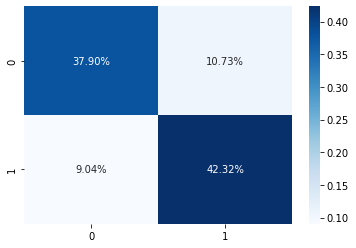

In [60]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [61]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'F1 Score:{f1_score(y_test,y_pred)}')
f = f1_score(y_test,y_pred)
voting_score = {'Model':voting_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(voting_score,ignore_index=True)

Precision Score:0.797752808988764
Recall Score:0.8239845261121856
F1 Score:0.8106565176022835


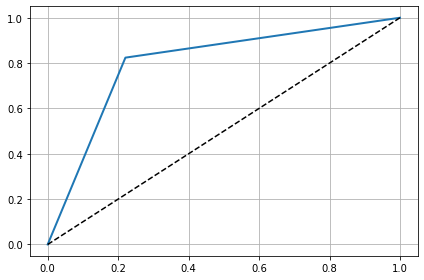

In [62]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr,tpr)
plt.tight_layout()
plt.grid()
plt.show()

In [63]:
roc_auc_score(y_test,y_pred)

0.8016756134136005

## AdaBoostClassifier

In [64]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=400,algorithm='SAMME.R',learning_rate=0.5)

In [65]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=400)

In [66]:
y_pred = ada_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
a = accuracy_score(y_test,y_pred)

0.8072528564331843


In [67]:
confusion_matrix(y_test,y_pred)

array([[792, 187],
       [201, 833]], dtype=int64)

<AxesSubplot:>

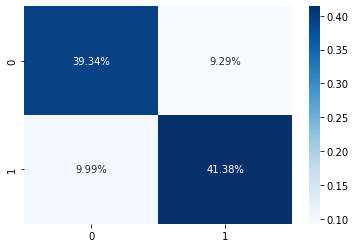

In [68]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [69]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'F1 Score:{f1_score(y_test,y_pred)}')
f = f1_score(y_test,y_pred)
ada_score = {'Model':ada_clf.__class__.__name__,'Accuracy Score':a,'F1 Score':f}
prediction_df = prediction_df.append(ada_score,ignore_index=True)

Precision Score:0.8166666666666667
Recall Score:0.8056092843326886
F1 Score:0.8111002921129503


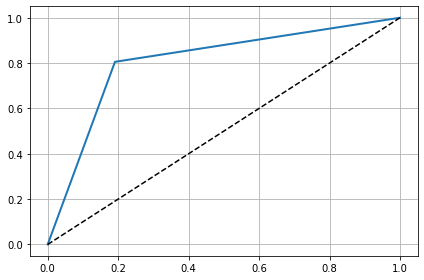

In [70]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr,tpr)
plt.tight_layout()
plt.grid()
plt.show()

In [71]:
roc_auc_score(y_test,y_pred)

0.8072990241888162

## Comparing all model's Scores

In [72]:
prediction_df

,Model,Accuracy Score,F1 Score
0,LogisticRegression,0.769995,0.770905
1,Decision Tree,0.786885,0.796006
2,BaggingClassifier,0.790859,0.799237
3,Random Forest,0.807253,0.817840
4,VotingClassifier,0.802285,0.810657
5,AdaBoostClassifier,0.807253,0.811100


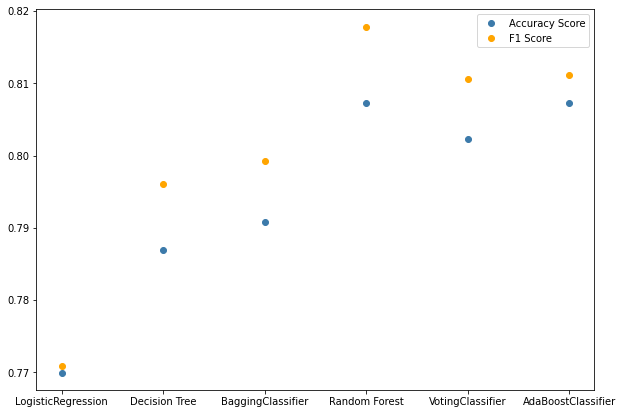

In [73]:
fig,ax = plt.subplots(figsize=(10,7),facecolor=(1, 1, 1))
ax.plot(prediction_df['Model'],prediction_df['Accuracy Score'],'o',color='#3c7aaa',label='Accuracy Score')
ax.plot(prediction_df['Model'],prediction_df['F1 Score'],'o',color='orange',label='F1 Score')
plt.legend()
fig.savefig('Model Scores.png',dpi=300)

## All ROC curves compared

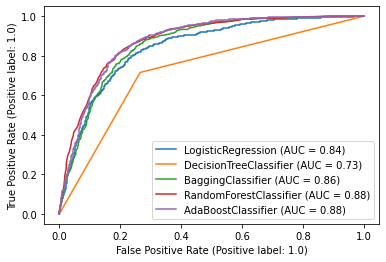

In [74]:
disp = RocCurveDisplay.from_estimator(lr_clf,x_test,y_test)
RocCurveDisplay.from_estimator(tree_clf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(bag_clf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(rnd_clf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(ada_clf,x_test,y_test,ax=disp.ax_)